In [29]:
import rawpy
import numpy as np
import matplotlib.pyplot as plt
from dataset_navigation import get_image_paths
from post_processor import PostProcessor, get_gray_world_constants
from raw_utils import pack_raw


In [ ]:
image_pairs = [(rawpy.imread(file_paths[i][0]).postprocess(use_camera_wb=True), rawpy.imread(file_paths[i][1]).postprocess(use_camera_wb=True)) for i in [0, 16, 227, 72, 67, 165, 220, 65]]

In [4]:
paths = get_image_paths()
diffused = paths['filter_long_exp']
long_exp = paths['long_exp']
short_exp = paths['short_exp']

In [36]:
idx = 19
raw = rawpy.imread(diffused[idx])
postprocessed_rawpy = raw.postprocess(use_camera_wb=True, no_auto_bright=True, output_bps=16)

wb_constants = np.array(raw.camera_whitebalance[:3])
print(wb_constants)
# Make into ratios
wb_constants = wb_constants / wb_constants[1]
print(wb_constants)
wb_constants = wb_constants



[2231. 1024. 1464.]
[2.17871094 1.         1.4296875 ]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65535].


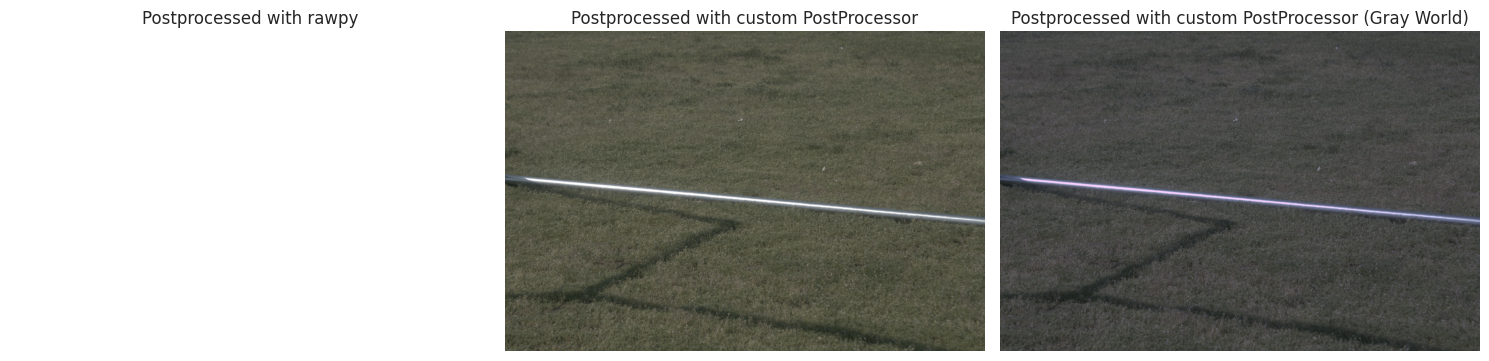

In [37]:
# Manually white balance the image
pp = PostProcessor(wb_constants, gamma=2.2)
processed_image = pp.postprocess(pack_raw(raw.raw_image_visible, normalize=True))
processed_image_gray = pp.postprocess(pack_raw(raw.raw_image_visible, normalize=True), get_gray_world_constants(pack_raw(raw.raw_image_visible, normalize=True)))

# Display the images
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(postprocessed_rawpy)
plt.title('Postprocessed with rawpy')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(processed_image)
plt.title('Postprocessed with custom PostProcessor')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(processed_image_gray)
plt.title('Postprocessed with custom PostProcessor (Gray World)')
plt.axis('off')
plt.tight_layout()



plt.show()

# Try to write bloomed image to rawpy and postprocess it